Average Length: 17.62 nm
Standard Deviation: 4.70 nm


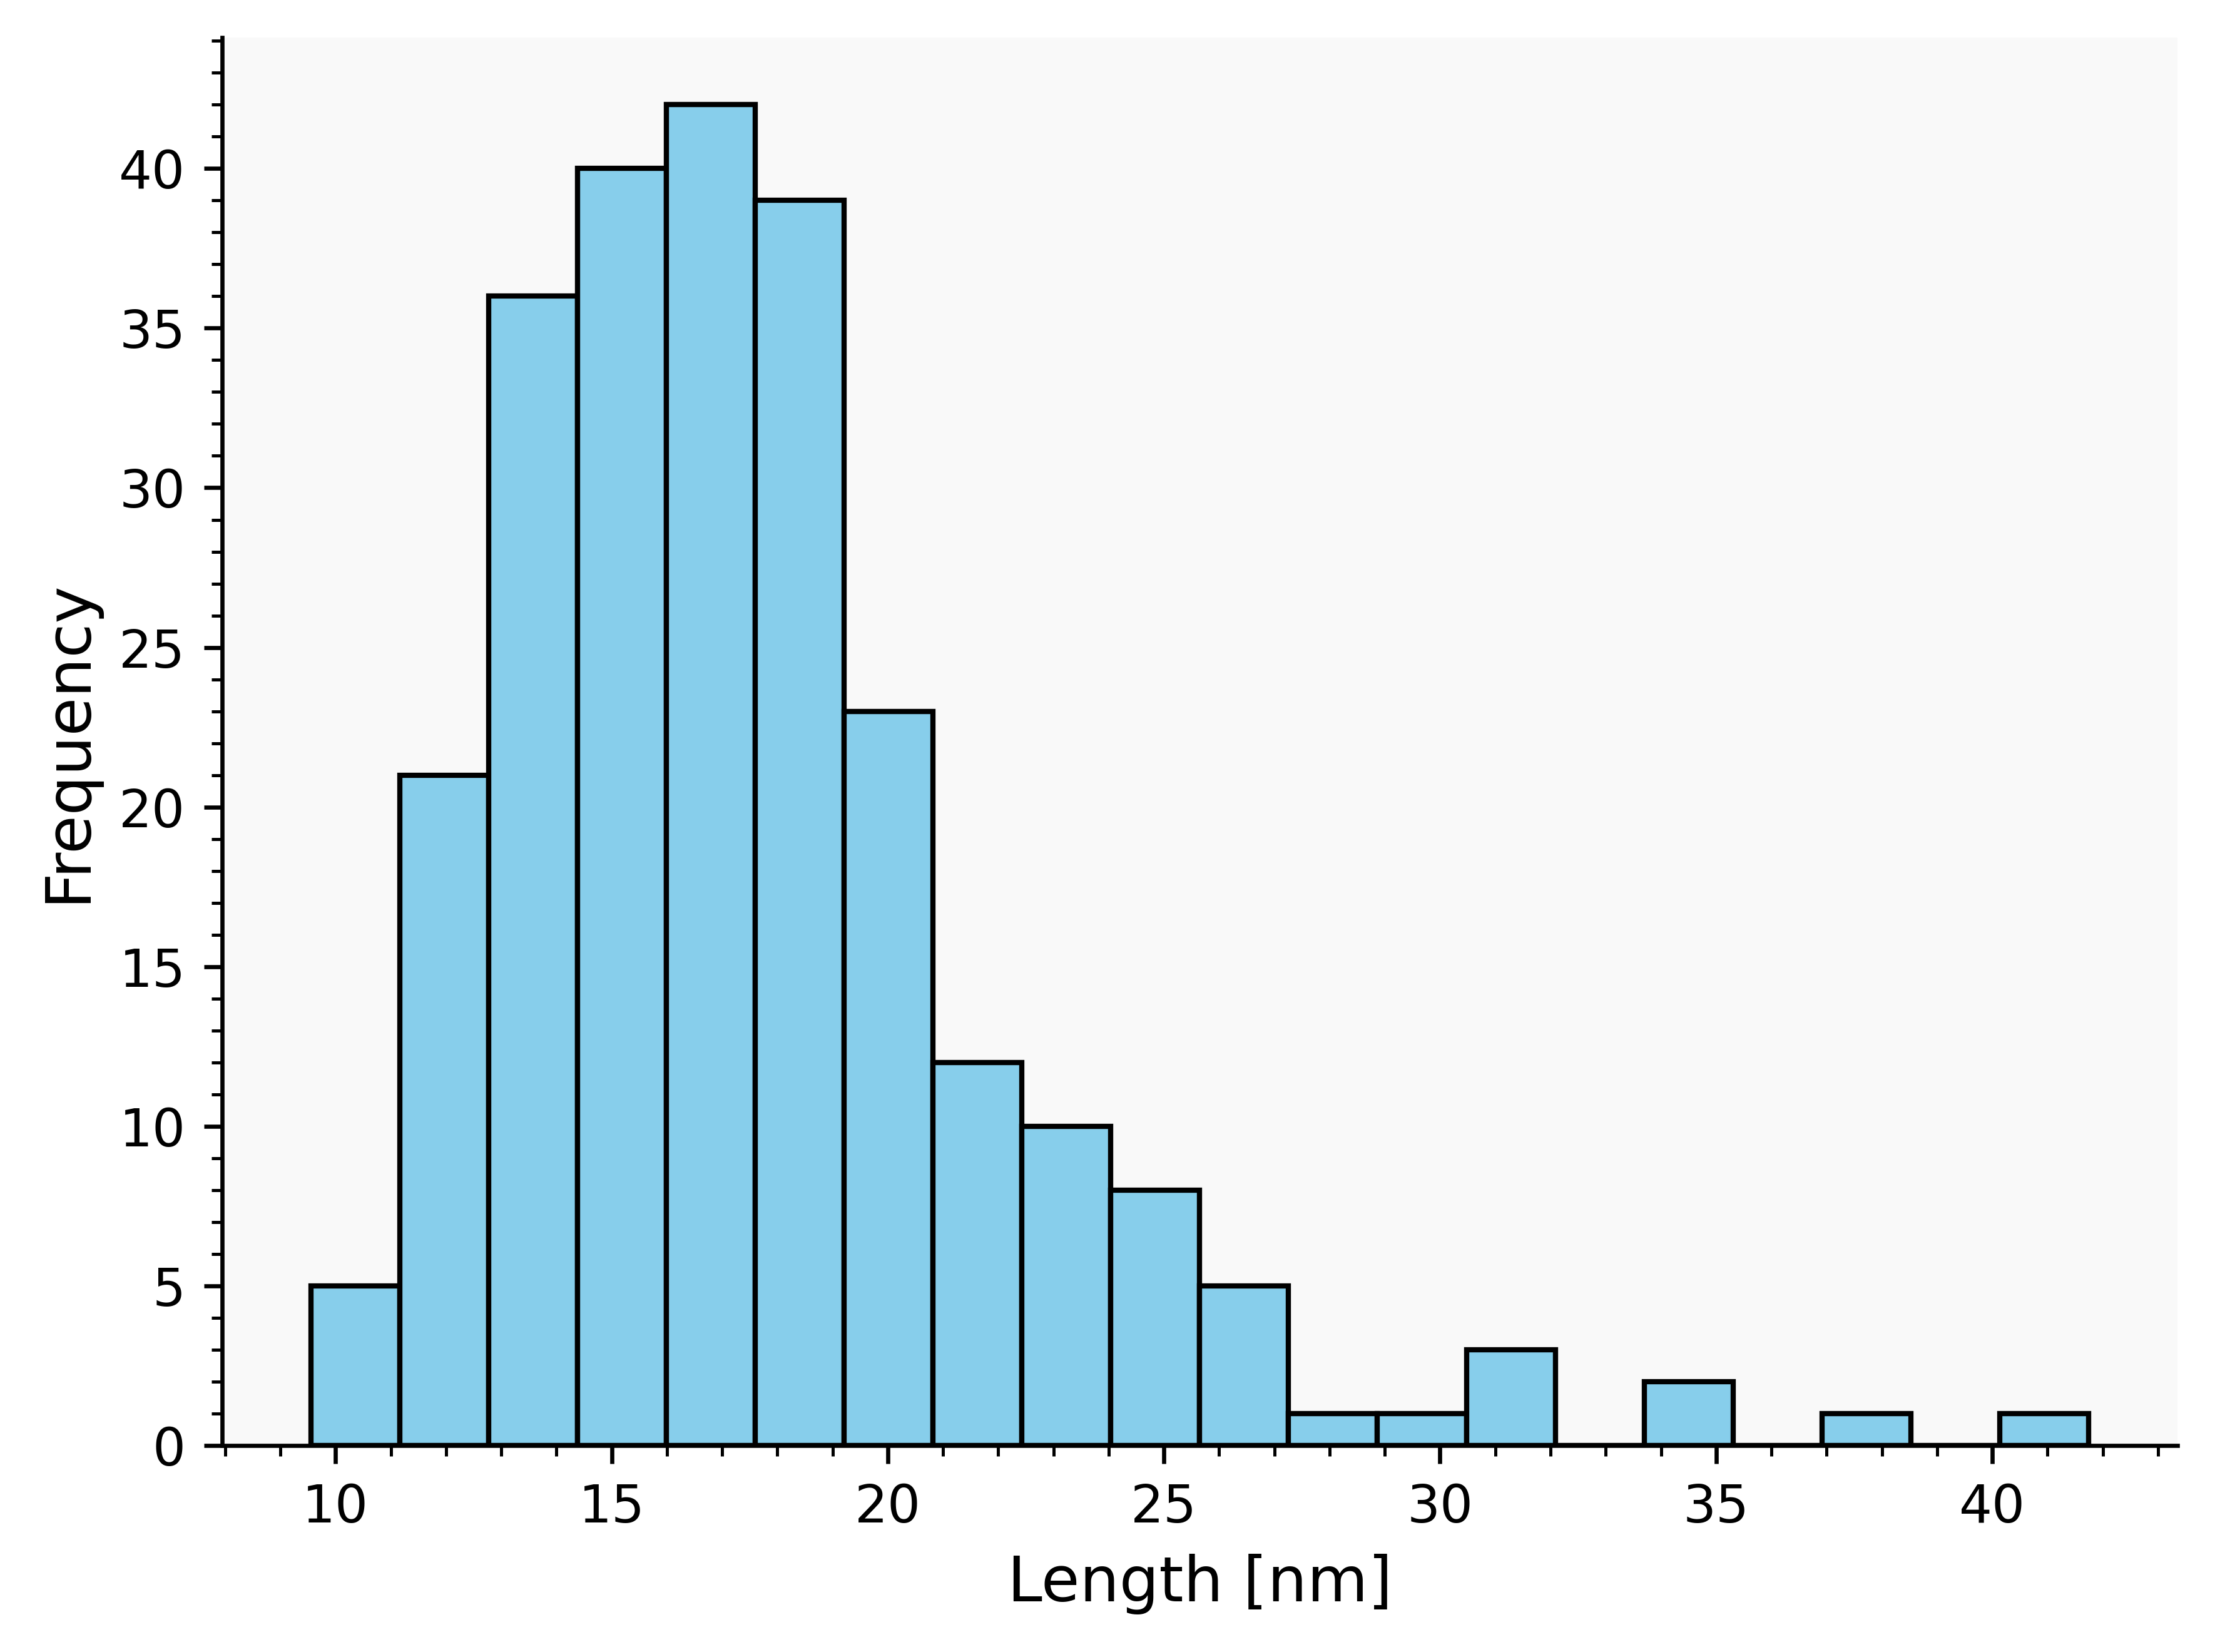

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# File path
file_path = r"C:\Users\emmak\OneDrive\Documents\BA6\Experimental physical chemistry TP\Challenge B\TEM\sample5_picture_all.csv"

# Load CSV with correct delimiter and skip first row
df = pd.read_csv(file_path, delimiter=',', header=None, skiprows=1)
df.columns = ["Index", "Area", "Mean", "Min", "Max", "Angle", "Length"]

# Compute statistics
avg_length = np.mean(df["Length"])
std_dev_length = np.std(df["Length"])

print(f"Average Length: {avg_length:.2f} nm")
print(f"Standard Deviation: {std_dev_length:.2f} nm")

# Plot setup
fig, ax = plt.subplots(figsize=(6, 5), dpi=600)

# Plot histogram
n, bins, patches = ax.hist(df["Length"], bins=20, color='skyblue', edgecolor='black', zorder=2)

# Styling
ax.set_facecolor('#f9f9f9')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Labels
ax.set_xlabel("Length [nm]", fontsize=12)
ax.set_ylabel("Frequency", fontsize=12)

# Optional: minor ticks on, no grid
plt.minorticks_on()

# Layout adjustments
plt.tight_layout(rect=[0, 0.1, 1, 1])

# Show plot
plt.show()


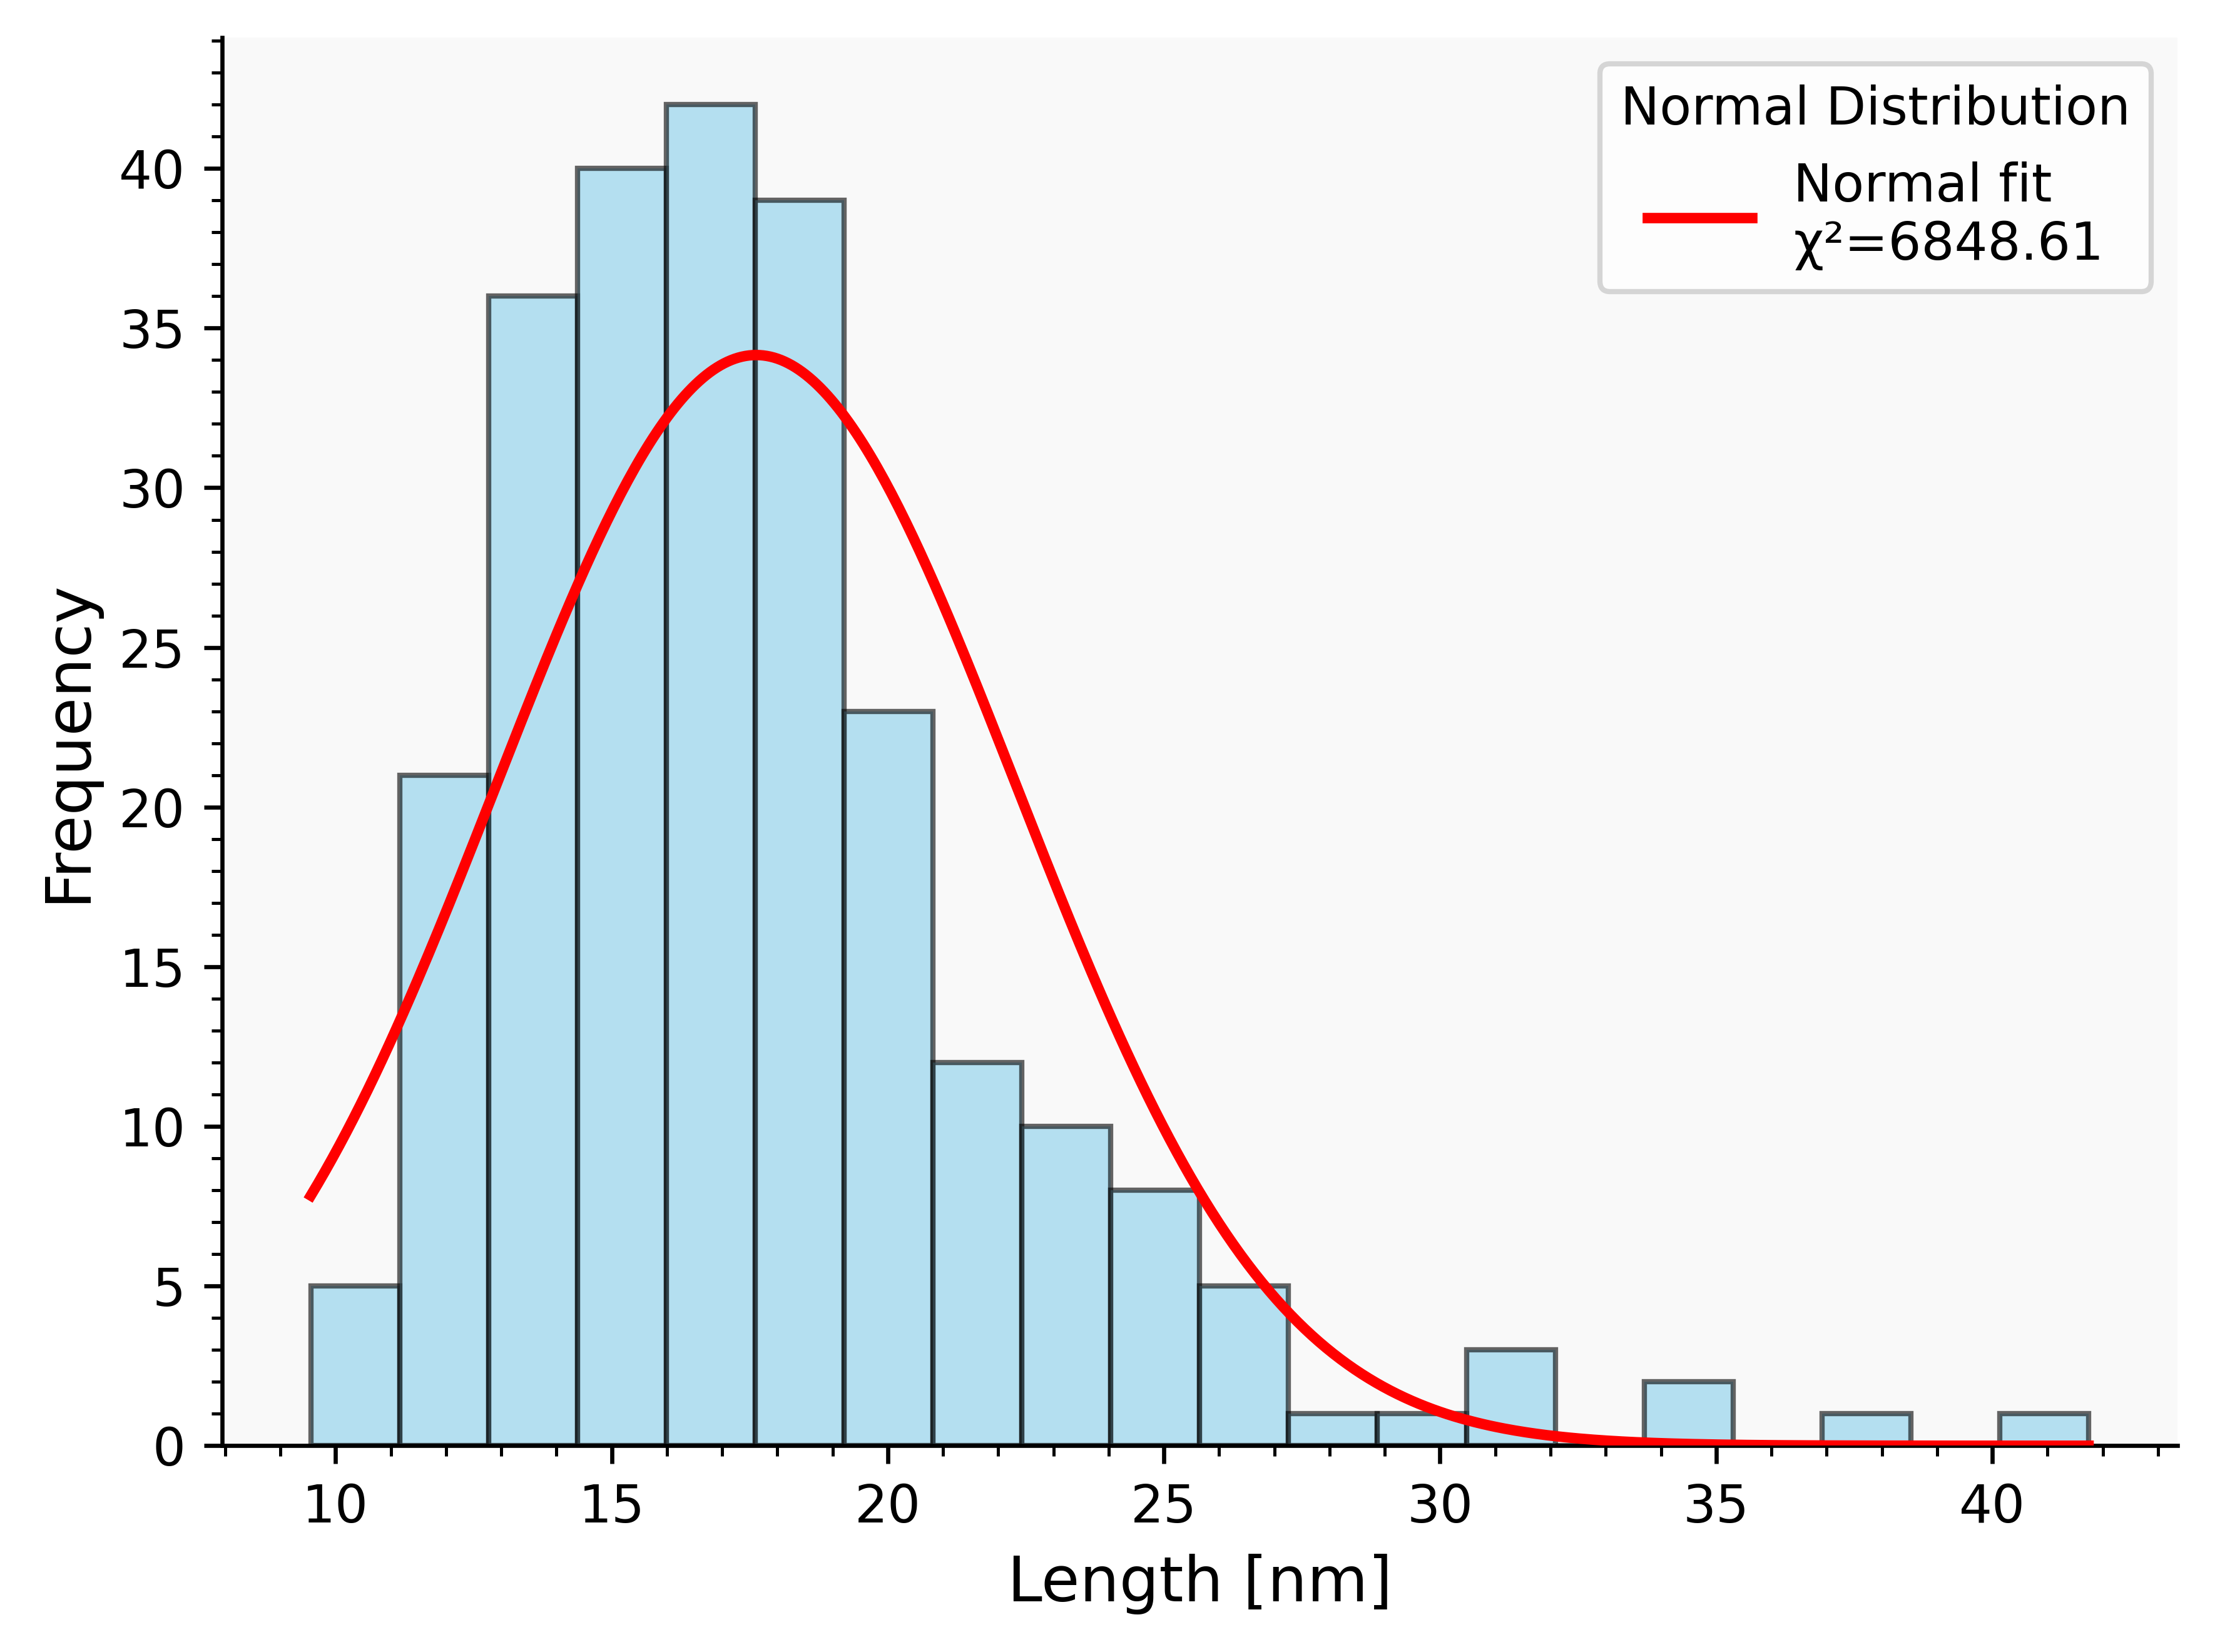

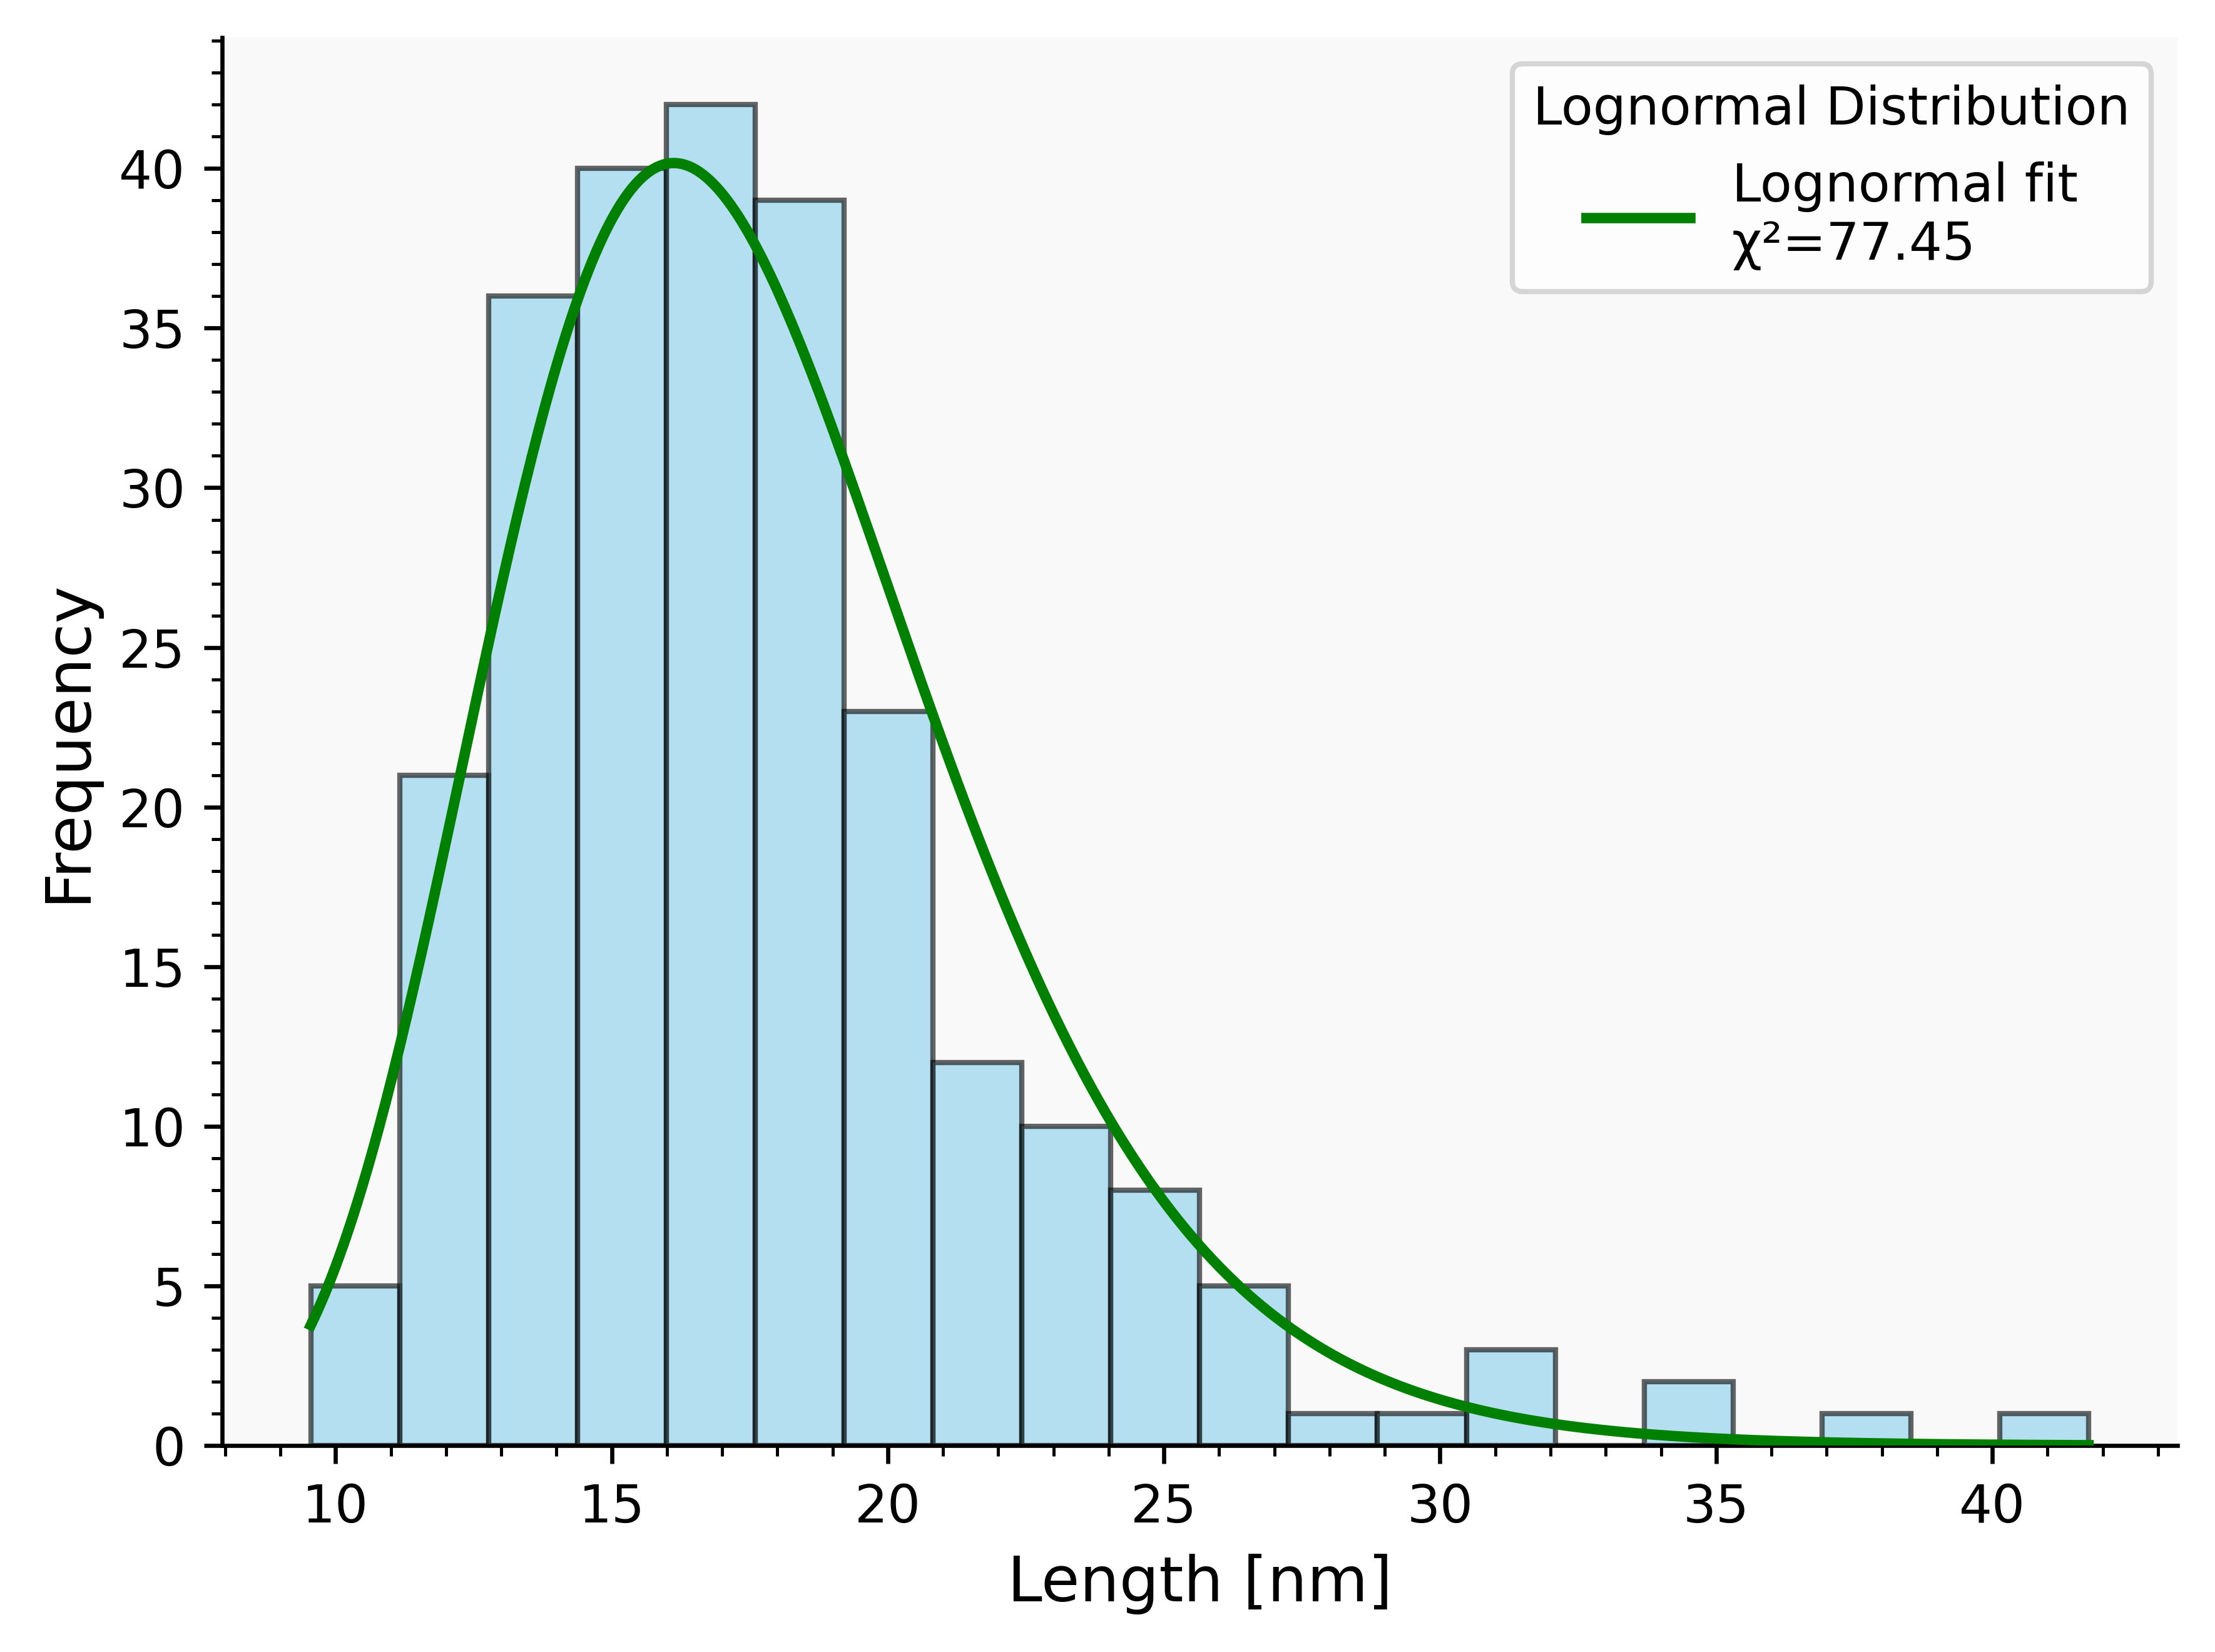

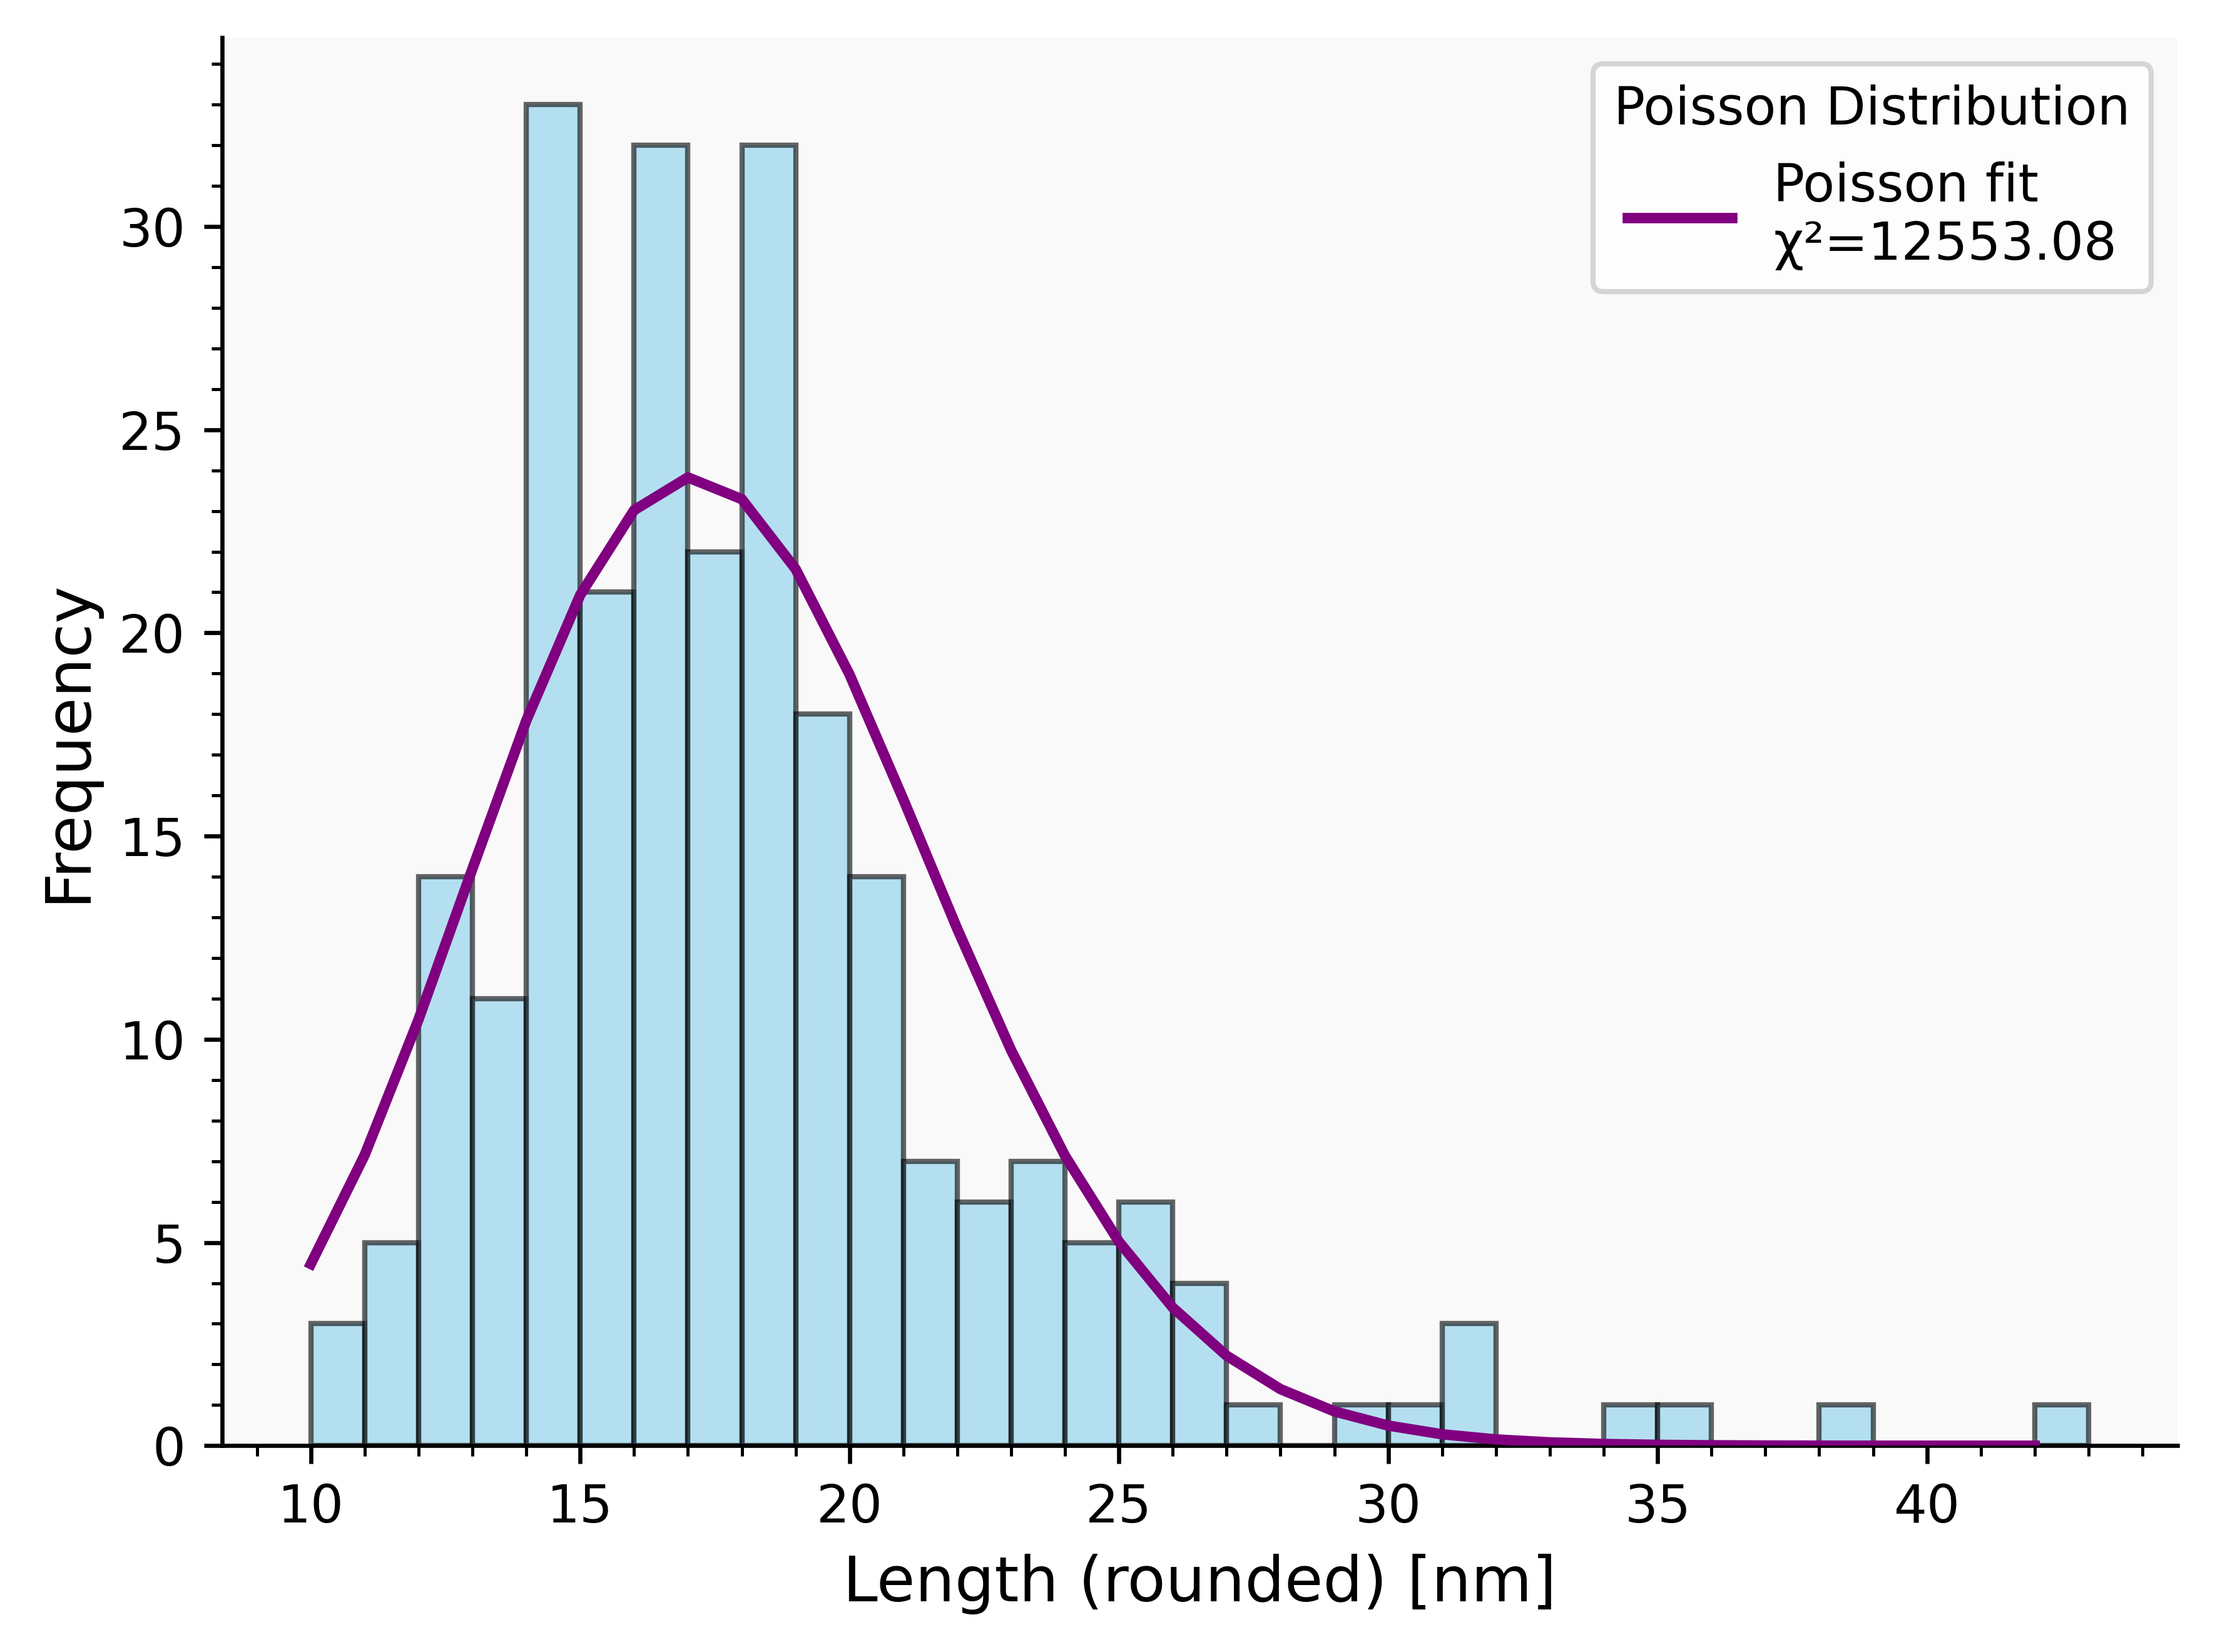

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm, lognorm, poisson

# Load and prepare data
file_path = r"C:\Users\emmak\OneDrive\Documents\BA6\Experimental physical chemistry TP\Challenge B\TEM\sample5_picture_all.csv"
df = pd.read_csv(file_path, delimiter=',', header=None, skiprows=1)
df.columns = ["Index", "Area", "Mean", "Min", "Max", "Angle", "Length"]
lengths = df["Length"]
lengths = lengths[lengths < 100]  # Optional filtering to exclude extreme values

# Common binning
bins = 20
counts, bin_edges = np.histogram(lengths, bins=bins)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
bin_width = bin_edges[1] - bin_edges[0]
x = np.linspace(lengths.min(), lengths.max(), 500)
n_total = len(lengths)

# Calculate average length
avg_length = np.mean(lengths)

# ===================== NORMAL =====================
mu_n, sigma_n = norm.fit(lengths)
expected_norm = norm.pdf(bin_centers, mu_n, sigma_n) * bin_width * n_total
chi2_norm = np.sum((counts - expected_norm) ** 2 / (expected_norm + 1e-6))

fig, ax = plt.subplots(figsize=(6, 5), dpi=600)
ax.hist(lengths, bins=bin_edges, alpha=0.6, color='skyblue', edgecolor='black', zorder=2)
ax.plot(x, norm.pdf(x, mu_n, sigma_n) * bin_width * n_total, 'r-', lw=2, zorder=3,
        label=f'Normal fit\nχ²={chi2_norm:.2f}')
ax.set_facecolor('#f9f9f9')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel("Length [nm]", fontsize=12)
ax.set_ylabel("Frequency", fontsize=12)
plt.minorticks_on()
ax.legend(title="Normal Distribution", fontsize=10)
plt.tight_layout(rect=[0, 0.1, 1, 1])
plt.show()

# ===================== LOGNORMAL =====================
shape_l, loc_l, scale_l = lognorm.fit(lengths, floc=0)
expected_lognorm = lognorm.pdf(bin_centers, shape_l, loc=loc_l, scale=scale_l) * bin_width * n_total
chi2_lognorm = np.sum((counts - expected_lognorm) ** 2 / (expected_lognorm + 1e-6))

fig, ax = plt.subplots(figsize=(6, 5), dpi=600)
ax.hist(lengths, bins=bin_edges, alpha=0.6, color='skyblue', edgecolor='black', zorder=2)
ax.plot(x, lognorm.pdf(x, shape_l, loc=loc_l, scale=scale_l) * bin_width * n_total, 'green', lw=2, zorder=3,
        label=f'Lognormal fit\nχ²={chi2_lognorm:.2f}')
ax.set_facecolor('#f9f9f9')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel("Length [nm]", fontsize=12)
ax.set_ylabel("Frequency", fontsize=12)
plt.minorticks_on()
ax.legend(title="Lognormal Distribution", fontsize=10)
plt.tight_layout(rect=[0, 0.1, 1, 1])
plt.show()

# ===================== POISSON =====================
lengths_rounded = lengths.round().astype(int)
counts_p, bin_edges_p = np.histogram(lengths_rounded, bins=range(lengths_rounded.min(), lengths_rounded.max() + 2))
x_poisson = np.arange(lengths_rounded.min(), lengths_rounded.max() + 1)
mu_p = lengths_rounded.mean()
expected_poisson = poisson.pmf(x_poisson, mu_p) * n_total
chi2_poisson = np.sum((counts_p - expected_poisson) ** 2 / (expected_poisson + 1e-6))

fig, ax = plt.subplots(figsize=(6, 5), dpi=600)
ax.hist(lengths_rounded, bins=range(lengths_rounded.min(), lengths_rounded.max() + 2),
        alpha=0.6, color='skyblue', edgecolor='black', zorder=2)
ax.plot(x_poisson, expected_poisson, 'purple', lw=2, zorder=3,
        label=f'Poisson fit\nχ²={chi2_poisson:.2f}')
ax.set_facecolor('#f9f9f9')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel("Length (rounded) [nm]", fontsize=12)
ax.set_ylabel("Frequency", fontsize=12)
plt.minorticks_on()
ax.legend(title="Poisson Distribution", fontsize=10)
plt.tight_layout(rect=[0, 0.1, 1, 1])
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

file_path = r"C:\Users\emmak\OneDrive\Documents\BA6\Experimental physical chemistry TP\Challenge B\TEM\sample5_picture_all.csv"

df = pd.read_csv(file_path, delimiter=',', header=None, skiprows=1)
df.columns = ["Index", "Area", "Mean", "Min", "Max", "Angle", "Length"]

avg_length = np.mean(df["Length"])
std_dev_length = np.std(df["Length"])

print(f"Average Length: {avg_length:.2f} nm")
print(f"Standard Deviation: {std_dev_length:.2f} nm")



Average Length: 17.62 nm
Standard Deviation: 4.70 nm
